Found 2352 images belonging to 2 classes.
Found 2381 images belonging to 2 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 64, 192)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64, 64)         │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,786 (182.76 KB)

 Trainable params: 46,786 (182.76 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 74s 893ms/step - accuracy: 0.5038 - loss: 0.7202 - val_accuracy: 0.4935 - val_loss: 0.6960 - learning_rate: 0.0010
Epoch 2/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 22s 295ms/step - accuracy: 0.5094 - loss: 0.7037 - val_accuracy: 0.4994 - val_loss: 0.7028 - learning_rate: 0.0010
Epoch 3/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 219ms/step - accuracy: 0.5115 - loss: 0.6960 - val_accuracy: 0.5006 - val_loss: 0.6952 - learning_rate: 0.0010
Epoch 4/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step - accuracy: 0.4970 - loss: 0.6936 - val_accuracy: 0.4859 - val_loss: 0.6945 - learning_rate: 0.0010
Epoch 5/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 218ms/step - accuracy: 0.4974 - loss: 0.6936 - val_accuracy: 0.4889 - val_loss: 0.6936 - learning_rate: 0.0010
Epoch 6/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 16s 212ms/step - accuracy: 0.5106 - loss: 0.6967 - val_accuracy: 0.4981 - val_loss: 0.6940 - learning_rate: 0.0010
Epoch 7/40
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 263ms/step - accuracy: 0.5098 - los

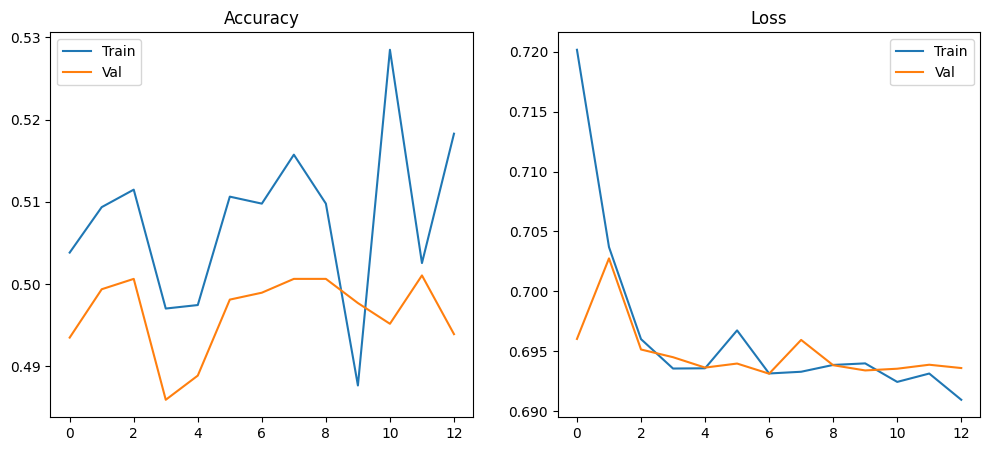

75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step


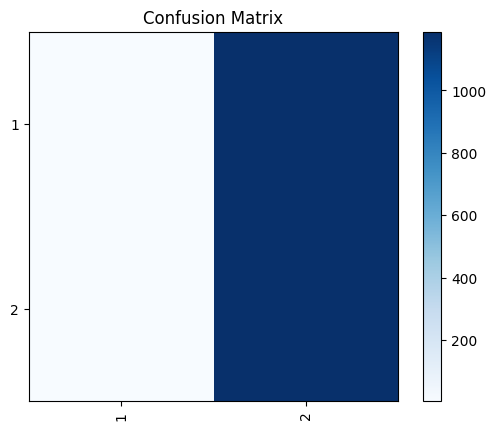

              precision    recall  f1-score   support

           1       0.44      0.00      0.01      1192
           2       0.50      1.00      0.66      1189

    accuracy                           0.50      2381
   macro avg       0.47      0.50      0.34      2381
weighted avg       0.47      0.50      0.34      2381



In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score

# Dataset directories
train_dir = r"C:\Users\cherisma\OneDrive\Desktop\IIIT-HW-Telugu\TeluguSeg\train"
val_dir = r"C:\Users\cherisma\OneDrive\Desktop\IIIT-HW-Telugu\TeluguSeg\val"

IMG_SIZE = (64, 64)
BATCH_SIZE = 32

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)


# ---------------------------------------------------------
# ✅ ULTRA FAST PURE RNN MODEL (GRU + Projection)
# ---------------------------------------------------------

inputs = Input(shape=(*IMG_SIZE, 3))

# RESHAPE: 64 timesteps, 192 features
x = Reshape((64, 64 * 3))(inputs)

# COMPRESSION LAYER (Projection)
x = Dense(64, activation="relu")(x)  # reduces feature size to 64 → Very fast

# FAST GRU 1
x = GRU(64, return_sequences=True, dropout=0.1)(x)

# FAST GRU 2
x = GRU(32, dropout=0.1)(x)

# Classification head
x = Dropout(0.2)(x)
outputs = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

print(model.summary())

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5)

# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=40,
    callbacks=[early_stop, reduce_lr]
)

# ---------------------------------------------------------
# PLOTS
# ---------------------------------------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Loss')
plt.legend()

plt.show()

# ---------------------------------------------------------
# EVALUATION
# ---------------------------------------------------------
val_gen.reset()
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes
names = list(val_gen.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(names)), names, rotation=90)
plt.yticks(np.arange(len(names)), names)
plt.show()

print(classification_report(y_true, y_pred, target_names=names))
